## Import Requirements

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import random
from sklearn.svm import SVC

## 1) Data Preparation

### 1-1) Dataset Understanding

In [2]:
data = pd.read_csv('/home/mehran/Projects/horse_survival/horse.csv')

In [3]:
data['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [5]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
labels = data['outcome']
samples = data.drop(columns=['outcome', 'cp_data', 'hospital_number'])

### 1-2) Creating Train and Test Data:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=0.1, random_state=1)

In [8]:
len(x_train)

269

In [9]:
x_train.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3
85,no,adult,38.0,54.0,30.0,warm,reduced,pale_pink,3,mild_pain,...,NaN,distend_small,45.0,6.2,NaN,NaN,no,400,0,0
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,decreased,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0
132,no,adult,37.9,40.0,24.0,normal,normal,normal_pink,less_3_sec,depressed,...,NaN,firm,40.0,5.7,NaN,NaN,yes,400,0,0
285,no,adult,37.8,82.0,12.0,cool,normal,normal_pink,more_3_sec,severe_pain,...,NaN,NaN,50.0,7.0,NaN,NaN,yes,2205,0,0
131,no,adult,37.6,88.0,36.0,cool,normal,normal_pink,less_3_sec,mild_pain,...,NaN,NaN,44.0,6.0,NaN,NaN,yes,1400,0,0


### 1-3) Number of Missing Data for Each Feature

In [10]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

### 1-4) Missing Data Percentage for Each Feature

In [11]:
(data.isnull().sum() / len(data)) * 100

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

## 2) Visualization

In [12]:
numerical_features = list(set(x_train.select_dtypes(exclude='object').columns) - set(['lesion_1', 'lesion_2', 'lesion_3']))

### 2-1) Features' Distribution

In [13]:
def plot_distribution(x=x_train, y=y_train, num_feat=numerical_features):
    num_cols = 2 
    num_rows = (len(num_feat) + 1) // num_cols
    
    plt.figure(figsize=(12, 26)) 

    for i, feature in enumerate(numerical_features, start=1):
        plt.subplot(num_rows, num_cols, i) 
        sns.histplot(data=x, x=feature, multiple="stack", kde=True, bins=30, shrink=0.9)
        plt.title(f'{feature} Distribution', fontsize=12, fontweight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

    return plt

<module 'matplotlib.pyplot' from '/home/mehran/Envs/venv0/lib64/python3.11/site-packages/matplotlib/pyplot.py'>

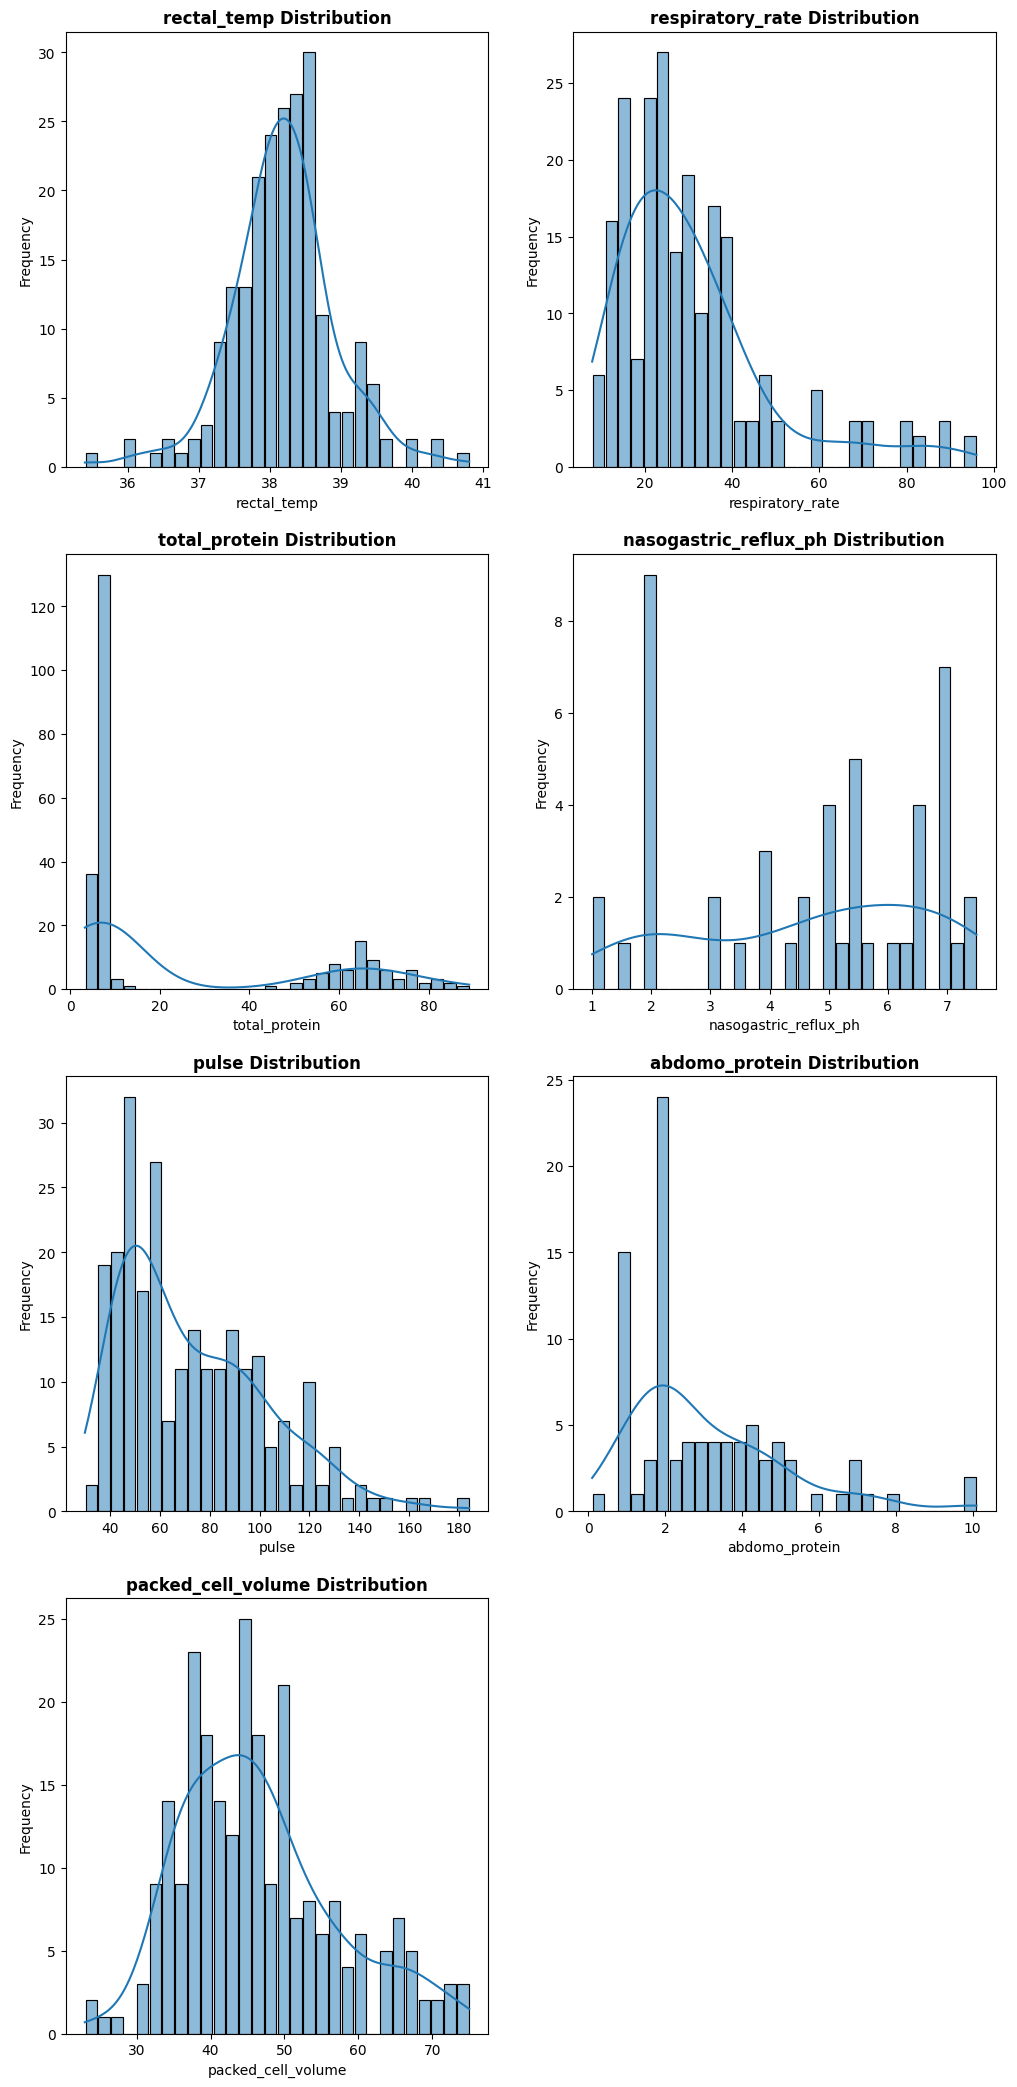

In [14]:
dist_plot = plot_distribution(x_train, y_train, numerical_features)
dist_plot

In [15]:
cat_features = x_train.select_dtypes(include='object')

### 2-2) Count-plot for Categorical Features

In [16]:
def plot_count(x=x_train, y=y_train, cat_feat=cat_features):
    num_cols = 2
    num_rows = (len(cat_feat.columns) + 1) // num_cols
    
    plt.figure(figsize=(12, 26))
    
    for i, feature in enumerate(cat_feat.columns, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(data=x, x=feature, hue=y, palette="YlGnBu")
        plt.title(f' Count Table for {feature} and the outcome', fontsize=12, fontweight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    
    plt.tight_layout(h_pad=2.6)
    return plt

<module 'matplotlib.pyplot' from '/home/mehran/Envs/venv0/lib64/python3.11/site-packages/matplotlib/pyplot.py'>

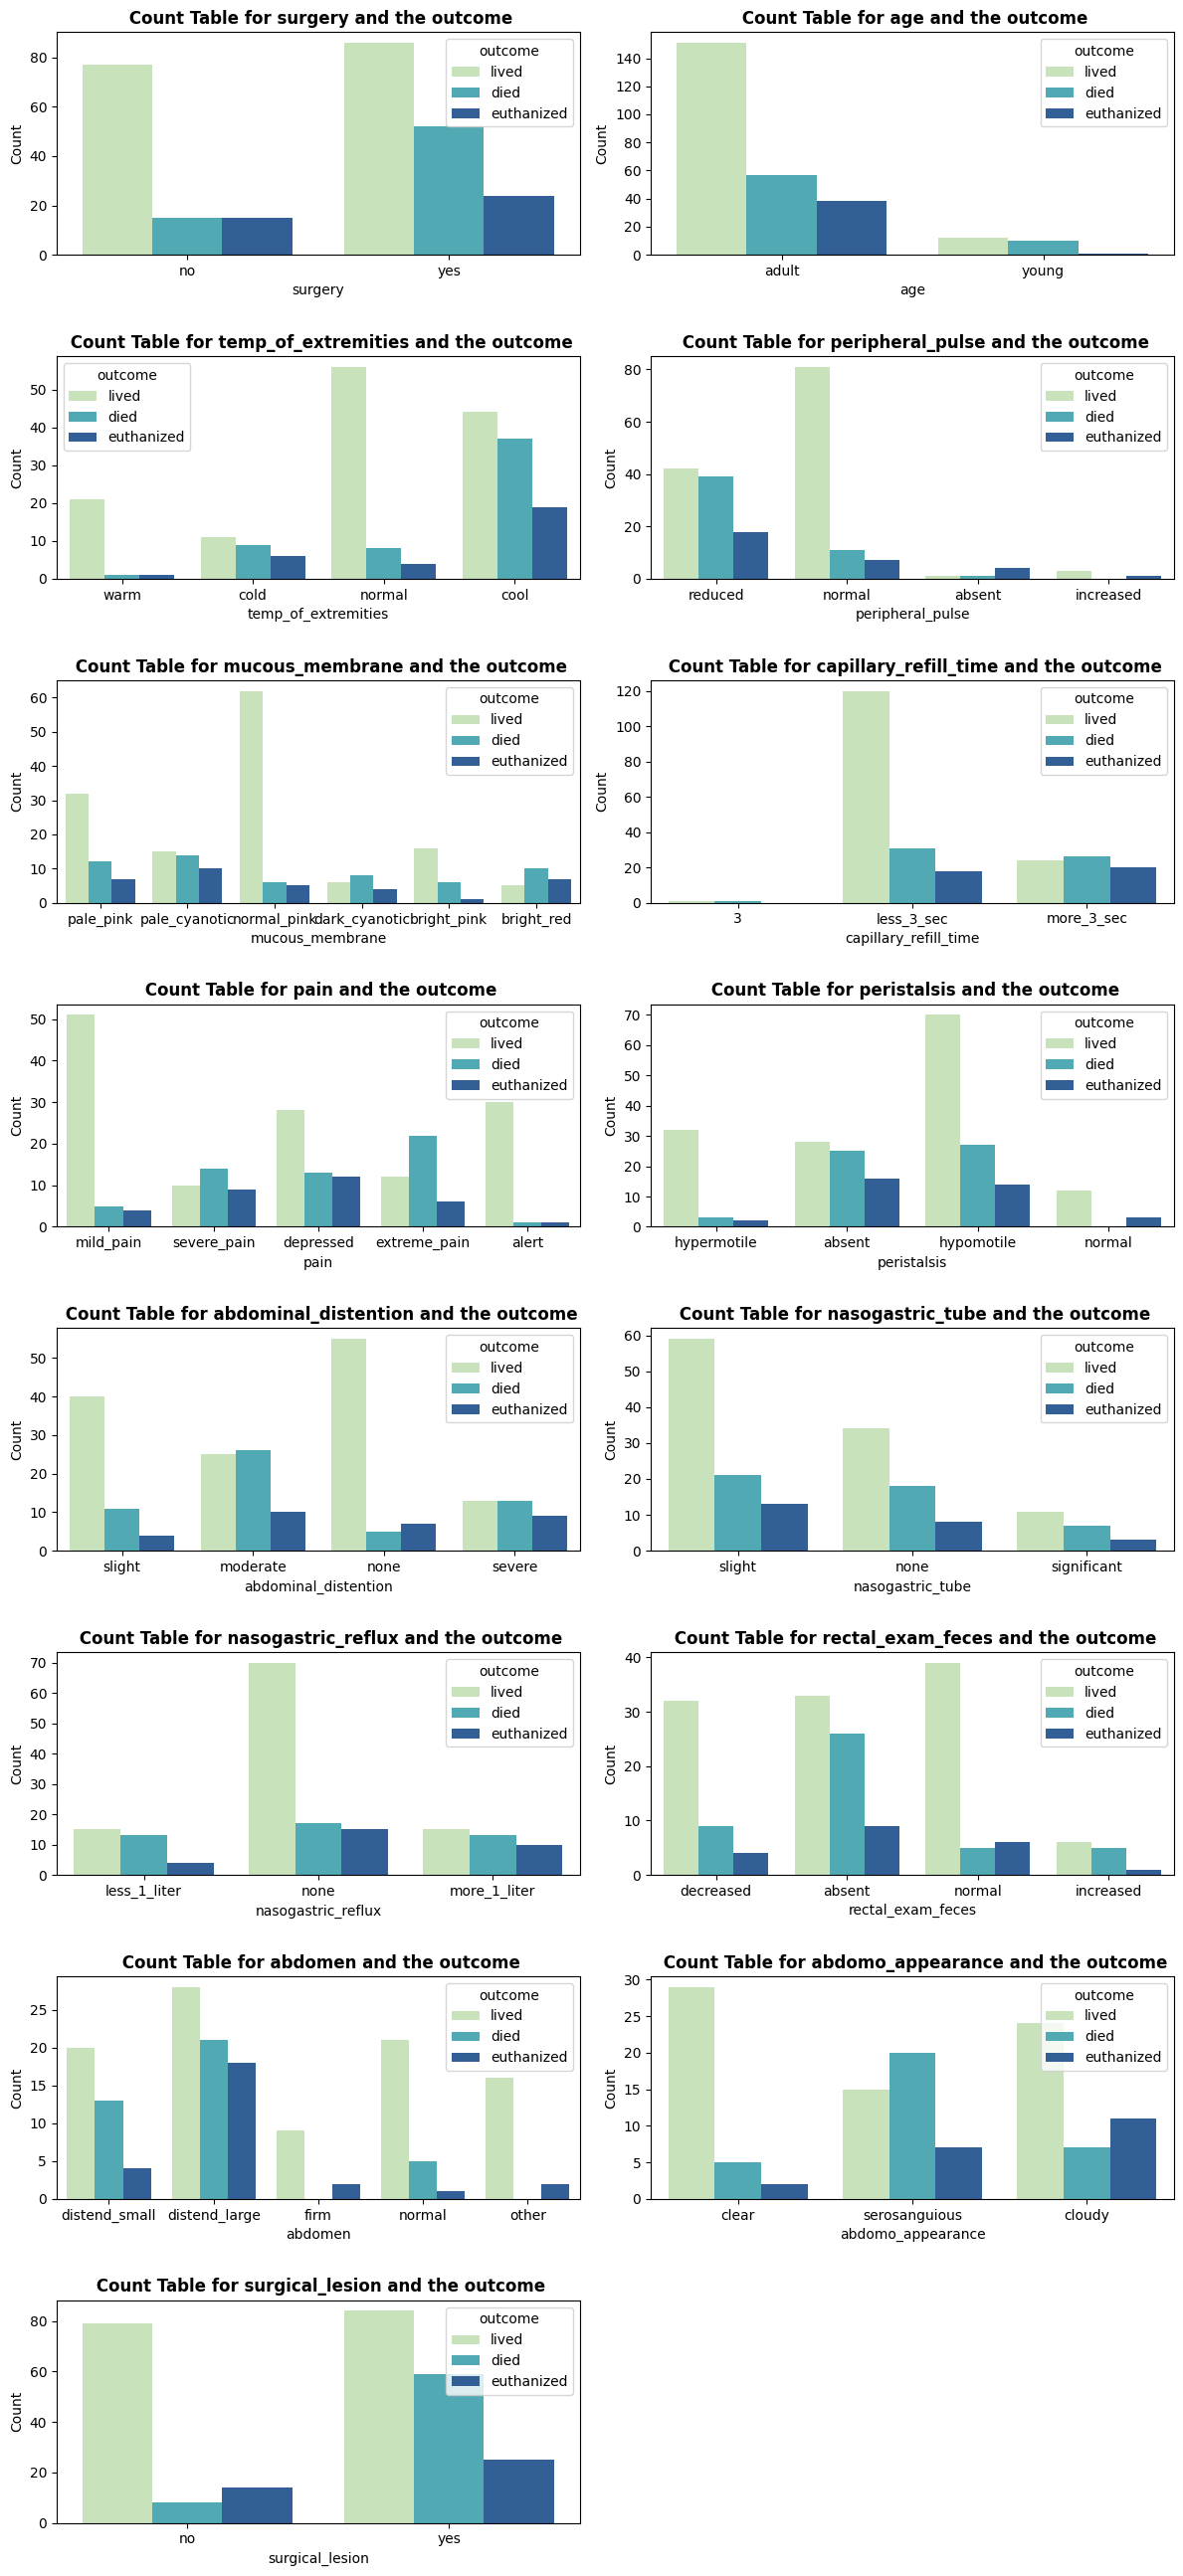

In [17]:
count_plot = plot_count(x_train)
count_plot

### 2-3) 'Outcome' Count-plot

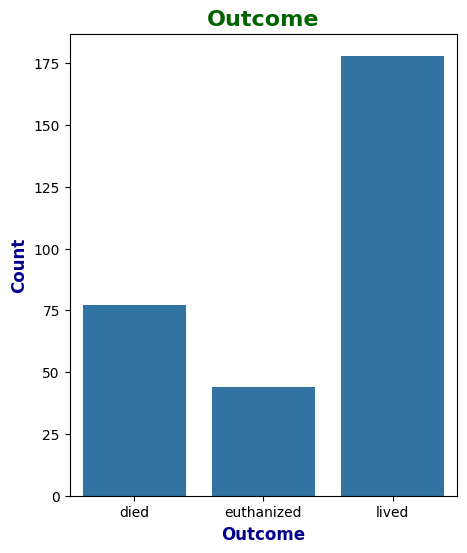

In [18]:
plt.figure(figsize=(5, 6))
sns.countplot(x='outcome', data=data)
plt.title('Outcome', fontsize = 16, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Outcome', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.show()

### 2-4) Correlation Matrix

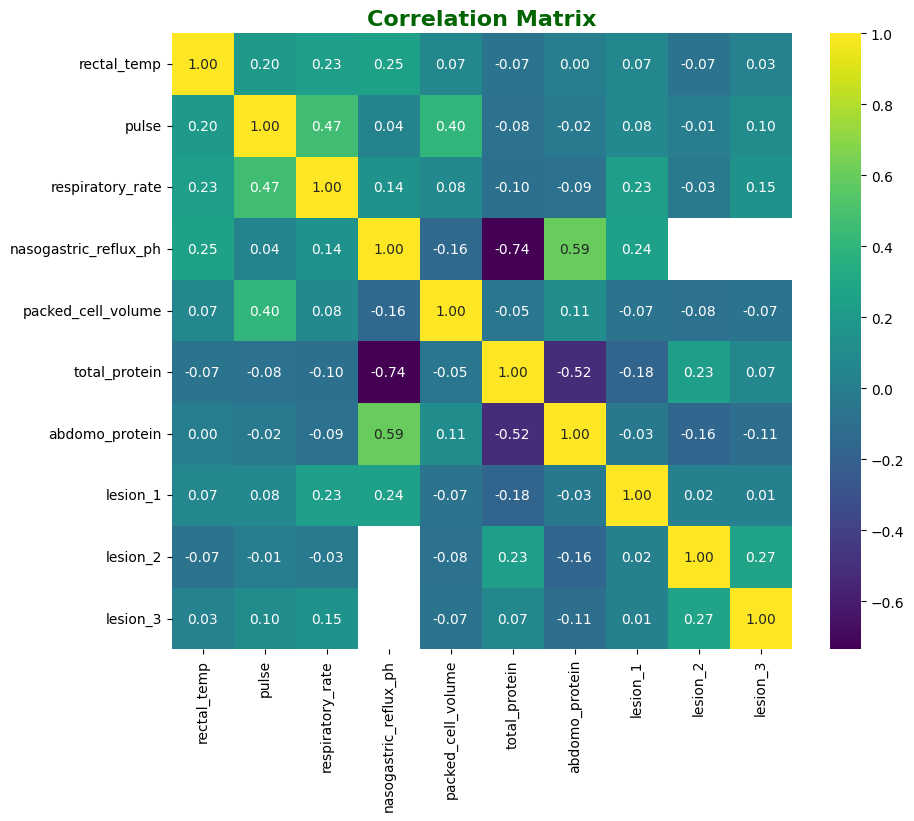

In [19]:
numeric_cols = x_train.select_dtypes(include=['number']).columns
correlation_matrix = x_train[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold',color = 'darkgreen')
plt.savefig('Correlation Matrix.png')
plt.show()

### 2-5) Scatter-plot based on the Correlation Matrix

In [20]:
scatter_dict = {'first': ['nasogastric_reflux_ph', 'abdomo_protein', 'Nasogastric Reflux PH', 'Abdomcentesis Total Protein'],
                'second': ['respiratory_rate', 'pulse', 'Respiratory Rate', 'Pulse'],
                'third': ['nasogastric_reflux_ph', 'total_protein', 'Nasogastric Reflux PH', 'Total Protein'],
                'forth': ['total_protein', 'abdomo_protein', 'Total Protein', 'Abdomcentesis Total Protein']}

In [21]:
def plot_scatter(x=x_train, y=y_train, scatter_dict=scatter_dict):
    for element in scatter_dict: 
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=scatter_dict[element][0], y=scatter_dict[element][1], hue=y, data=x)
        plt.title(f'Scatterplot of {scatter_dict[element][2]} vs {scatter_dict[element][3]}', fontsize=14, fontweight='bold',color = 'darkgreen')
        plt.xlabel(scatter_dict[element][2], fontsize=12, fontweight='bold',color = 'darkblue')
        plt.ylabel(scatter_dict[element][3], fontsize=12, fontweight='bold',color = 'darkblue')
        plt.legend(title='Outcome', fontsize=10)
        plt.show()

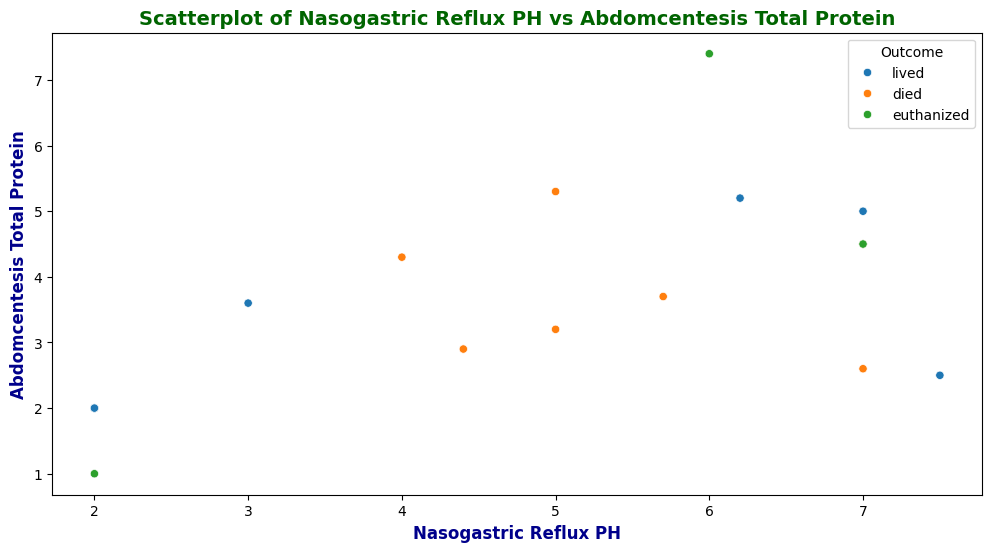

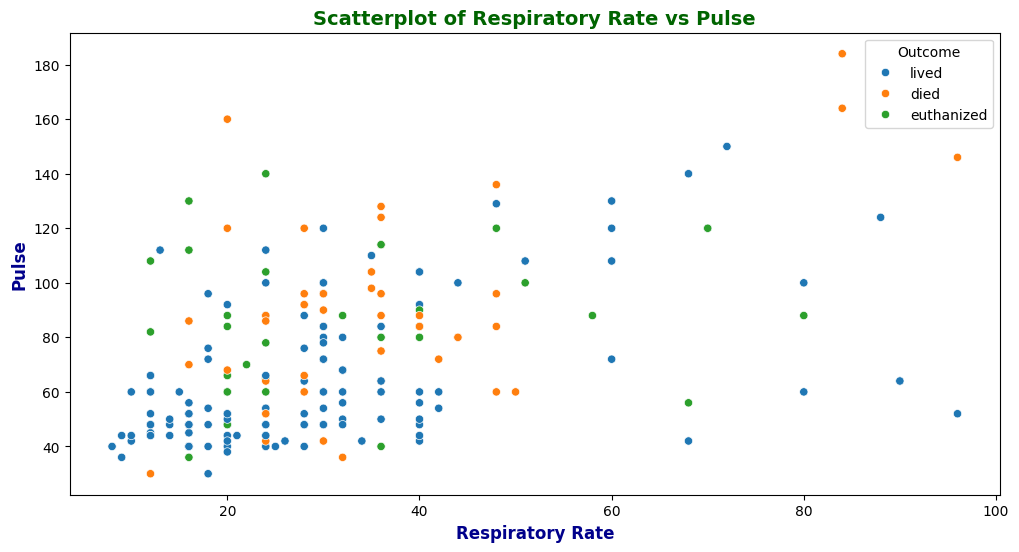

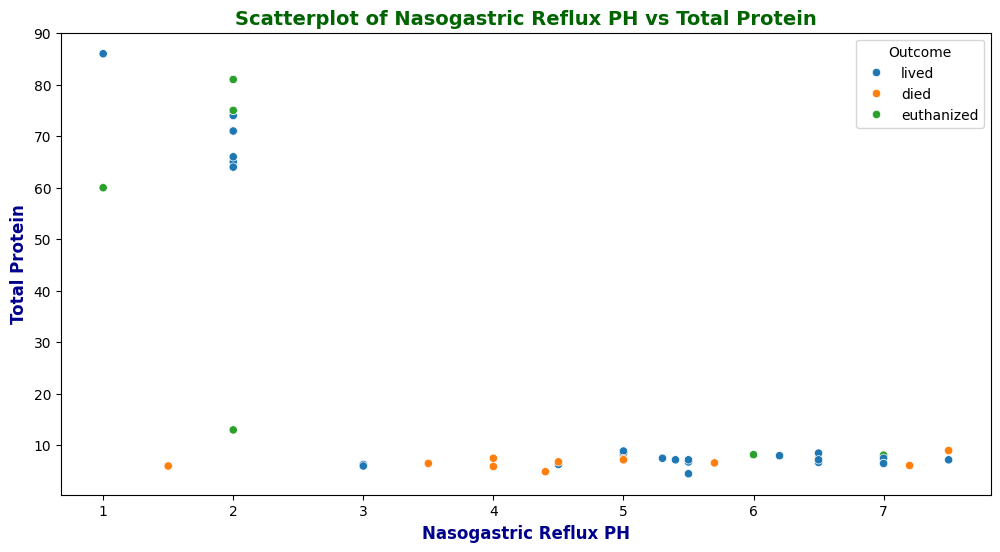

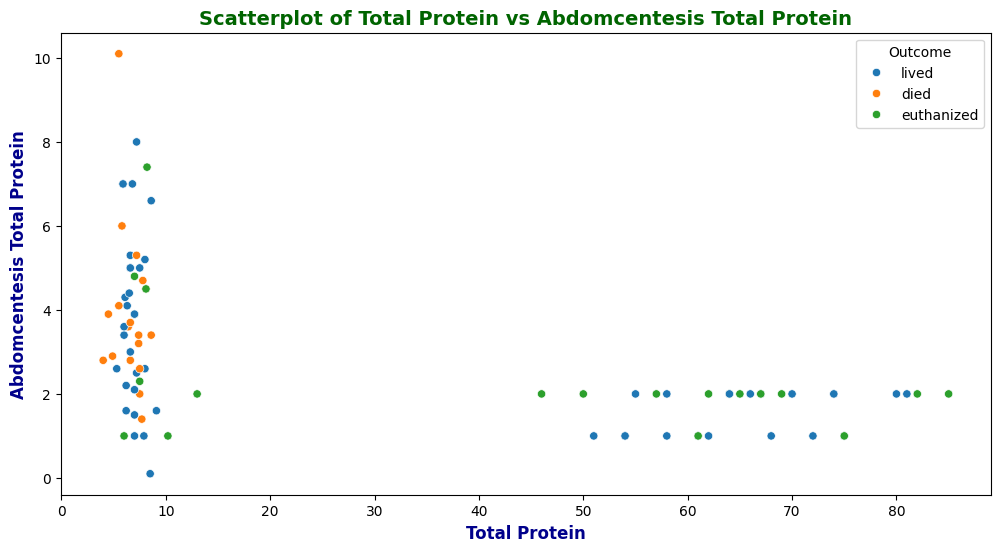

In [22]:
plot_scatter()

## 3) Data Preprocessing

### 3-1) Dealing with Missing Values

In [23]:
x_test.select_dtypes(include=['int64', 'float64']).isnull().sum()

rectal_temp               7
pulse                     2
respiratory_rate          4
nasogastric_reflux_ph    25
packed_cell_volume        5
total_protein             6
abdomo_protein           20
lesion_1                  0
lesion_2                  0
lesion_3                  0
dtype: int64

In [24]:
def miss_handler(data):
    imputer = SimpleImputer(strategy='most_frequent')
    data = pd.DataFrame(
        imputer.fit_transform(data), columns=data.columns
    ).astype(data.dtypes.to_dict())

    return data

In [25]:
x_train = miss_handler(x_train)
x_test = miss_handler(x_test)

### 3-2) Encoding the Categorical Features and Scaling the Numerical Features

In [26]:
num_feat = x_train.select_dtypes(include=['float64', 'int64'])

ordinal_categories = {
    'peripheral_pulse': ['normal', 'increased', 'reduced', 'absent'],
    'capillary_refill_time': ['more_3_sec', '3', 'less_3_sec'],
    'peristalsis': ['hypomotile', 'normal', 'hypermotile', 'absent'],
    'abdominal_distention': ['none', 'slight', 'moderate', 'severe'],
    'nasogastric_tube': ['none', 'slight', 'significant'],
    'nasogastric_reflux': ['none', 'less_1_liter', 'more_1_liter'],
    'rectal_exam_feces': ['normal', 'increased', 'decreased', 'absent'],
    'abdomen': ['normal', 'other', 'firm', 'distend_small', 'distend_large'],
    'abdomo_appearance': ['clear', 'cloudy', 'serosanguious']
}

nominal_cats = ['temp_of_extremities', 'mucous_membrane', 'pain']

class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)


class OrdinalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_categories):
        self.ordinal_categories = ordinal_categories
        self.ordinal_encoder = OrdinalEncoder(categories=[self.ordinal_categories[f] for f in self.ordinal_categories])

    def fit(self, X, y=None):
        return self.ordinal_encoder.fit(X)

    def transform(self, X):
        return self.ordinal_encoder.transform(X)


class NominalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.onehot_encoder = OneHotEncoder(drop='first')

    def fit(self, X, y=None):
        return self.onehot_encoder.fit(X)

    def transform(self, X):
        return self.onehot_encoder.transform(X)


train_preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', NumericalTransformer(), num_feat.columns),
        ('ordinal', OrdinalTransformer(ordinal_categories), list(ordinal_categories.keys())),
        ('nominal', NominalTransformer(), nominal_cats)
    ]
)

test_preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', NumericalTransformer(), num_feat.columns),
        ('ordinal', OrdinalTransformer(ordinal_categories), list(ordinal_categories.keys())),
        ('nominal', NominalTransformer(), nominal_cats)
    ]
)


train_pipeline = Pipeline(steps=[('preprocessor', train_preprocessor)])
test_pipeline = Pipeline(steps=[('preprocessor', test_preprocessor)])


In [27]:
x_train_transformed = train_pipeline.fit_transform(x_train)
x_test_transformed = test_pipeline.fit_transform(x_test)
num_ord_feature_names = (list(make_column_selector(dtype_include=['float64', 'int64'])(x_train)) +
                         list(ordinal_categories.keys()))


nom_feature_names = []
nominal_encoder = train_pipeline.named_steps['preprocessor'].transformers_[2][1].onehot_encoder
for i, col in enumerate(nominal_cats):
    categories = nominal_encoder.categories_[i][1:]
    nom_feature_names.extend([f'{col}_{cat}' for cat in categories])

feature_names = num_ord_feature_names + nom_feature_names

x_train_transformed = pd.DataFrame(x_train_transformed, columns=feature_names)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=feature_names)

In [28]:
x_train_transformed.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,...,temp_of_extremities_warm,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain
0,-0.234521,-0.592235,0.027347,-0.359030,-0.065322,-0.621231,-0.287231,-0.644911,-0.147097,-0.061085,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.994594,0.035524,0.027347,-0.359030,1.374983,-0.598783,-0.287231,-0.035403,-0.147097,-0.061085,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.386535,-1.080491,-0.340473,-0.359030,-0.545424,-0.639937,-0.287231,-0.644911,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.538550,0.384278,-1.076115,-0.359030,0.414779,-0.591301,-0.287231,-0.252697,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.842579,0.593531,0.395168,-0.735703,-0.161343,-0.628713,-0.287231,-0.427618,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
x_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rectal_temp                    269 non-null    float64
 1   pulse                          269 non-null    float64
 2   respiratory_rate               269 non-null    float64
 3   nasogastric_reflux_ph          269 non-null    float64
 4   packed_cell_volume             269 non-null    float64
 5   total_protein                  269 non-null    float64
 6   abdomo_protein                 269 non-null    float64
 7   lesion_1                       269 non-null    float64
 8   lesion_2                       269 non-null    float64
 9   lesion_3                       269 non-null    float64
 10  peripheral_pulse               269 non-null    float64
 11  capillary_refill_time          269 non-null    float64
 12  peristalsis                    269 non-null    flo

In [30]:
x_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rectal_temp                    30 non-null     float64
 1   pulse                          30 non-null     float64
 2   respiratory_rate               30 non-null     float64
 3   nasogastric_reflux_ph          30 non-null     float64
 4   packed_cell_volume             30 non-null     float64
 5   total_protein                  30 non-null     float64
 6   abdomo_protein                 30 non-null     float64
 7   lesion_1                       30 non-null     float64
 8   lesion_2                       30 non-null     float64
 9   lesion_3                       30 non-null     float64
 10  peripheral_pulse               30 non-null     float64
 11  capillary_refill_time          30 non-null     float64
 12  peristalsis                    30 non-null     float

## 4) Defining SVM Classifiers

### 4-1) Classifier Comaparator Function with Different Kernels

In [31]:
def kernel_comparator(clf_num, c, kernel, x_train, y_train, x_test, y_test, degree=-1, gamma=-1):
    history = dict()
    if gamma > 0 and degree < 0 :
        clf = SVC(C = c, kernel=kernel, gamma=gamma)
        degree='None'

    elif degree > 0 and gamma >0: 
        clf = SVC(C = c, kernel=kernel, degree=degree, gamma=gamma)
    
    else: 
        clf = SVC(C = c, kernel=kernel)
        degree = 'None'
        gamma = 'None'
    
    clf.fit(x_train, y_train)
    train_acc = clf.score(x_train, y_train)
    test_acc = clf.score(x_test, y_test)
    y_pred = clf.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    history[clf_num] = [kernel, train_acc, test_acc, precision, recall, c, degree, gamma]
    return history

In [ ]:
clf0 = kernel_comparator(0, 25, 'linear', x_train_transformed, y_train, x_test_transformed, y_test)
clf1 = kernel_comparator(1, 1, 'poly', x_train_transformed, y_train, x_test_transformed, y_test, degree=3, gamma=30)
clf2 = kernel_comparator(2, 35, 'poly', x_train_transformed, y_train, x_test_transformed, y_test, degree=4, gamma=5)
clf3 = kernel_comparator(3, 15, 'rbf', x_train_transformed, y_train, x_test_transformed, y_test, gamma=20)
clf4 = kernel_comparator(4, 2, 'rbf', x_train_transformed, y_train, x_test_transformed, y_test, gamma=0.5)

#### 4-1-1) The Result as a DataFrame

In [33]:
evals_list = [clf0, clf1, clf2, clf3, clf4]
histories = {}
counter = 0
for dict in evals_list:                                             
    for key in dict.keys():
        clf_num = 'clf' + ' ' + str(key)
        histories[clf_num] = dict[key]
        counter += 1

model_result = pd.DataFrame(histories.values(), index=histories.keys(), columns=['kernel', 'train_acc', 'test_acc', 'precision', 'recall', 'c', 'degree', 'gamma'])
model_result

,kernel,train_acc,test_acc,precision,recall,c,degree,gamma
clf 0,linear,0.795539,0.700000,0.611801,0.700000,25,None,None
clf 1,poly,1.000000,0.600000,0.583333,0.600000,1,3,30
clf 2,poly,1.000000,0.700000,0.660088,0.700000,35,4,5
clf 3,rbf,1.000000,0.500000,0.250000,0.500000,15,None,20
clf 4,rbf,0.988848,0.566667,0.601190,0.566667,2,None,0.5


### 4-2) Classifier Comaparator Function with Linear Kernel and Different C Values

In [34]:
def make_random(prev_num=0):
    flag = True
    while flag:
        num = random.random()
        if num > prev_num:
            flag = False
        else:
            num = prev_num
    return num

In [37]:
def linear_comparator(x_train, y_train, x_test, y_test):
    histories = {}
    c = 0
    for i in range(5):
        c = make_random(c)
        clf = SVC(C = c, kernel='linear')
        clf.fit(x_train, y_train)
        train_acc = clf.score(x_train, y_train)
        test_acc = clf.score(x_test, y_test)
        y_pred = clf.predict(x_test_transformed)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        histories[f'clf{i}'] = [train_acc, test_acc, precision, recall, c, clf]
    return histories

In [51]:
score_history = linear_comparator(x_train_transformed, y_train, x_test_transformed, y_test)


### 4-3) Classification Result (Accuracy, Precision, Recall)

In [54]:
def show_eval_metrics():
    counter = 0
    metrics = {}
    for item in score_history:
        clf_num = 'clf' + ' ' + str(counter)
        metrics[clf_num] = [score_history[item][0], score_history[item][1], score_history[item][2], score_history[item][3]]
        print(f'{clf_num}:\nTrain accuracy: {score_history[item][0]},\nTest accuracy: {score_history[item][1]}\nPrecision: {score_history[item][2]}\nRecall: {score_history[item][3]} \nc: {score_history[item][4]}')
        print('-----------------------------------------------------')
        counter += 1

    return metrics

In [55]:
eval_metrics = show_eval_metrics()

clf 0:
Train accuracy: 0.7881040892193308,
Test accuracy: 0.8
Precision: 0.8313840155945419
Recall: 0.8 
c: 0.8077723142324787
-----------------------------------------------------
clf 1:
Train accuracy: 0.7881040892193308,
Test accuracy: 0.8
Precision: 0.8313840155945419
Recall: 0.8 
c: 0.9299289576570443
-----------------------------------------------------
clf 2:
Train accuracy: 0.7843866171003717,
Test accuracy: 0.8
Precision: 0.8313840155945419
Recall: 0.8 
c: 0.9638969101290505
-----------------------------------------------------
clf 3:
Train accuracy: 0.7843866171003717,
Test accuracy: 0.8
Precision: 0.8313840155945419
Recall: 0.8 
c: 0.973356547582661
-----------------------------------------------------
clf 4:
Train accuracy: 0.7843866171003717,
Test accuracy: 0.8
Precision: 0.8313840155945419
Recall: 0.8 
c: 0.9893628494114751
-----------------------------------------------------


In [44]:
model_result = pd.DataFrame(eval_metrics.values(), index=eval_metrics.keys(), columns=['train_acc', 'test_acc', 'precision', 'recall'])

In [45]:
model_result

,train_acc,test_acc,precision,recall
clf 0,0.769517,0.733333,0.775926,0.733333
clf 1,0.784387,0.800000,0.831384,0.800000
clf 2,0.784387,0.800000,0.831384,0.800000
clf 3,0.784387,0.800000,0.831384,0.800000
clf 4,0.784387,0.800000,0.831384,0.800000


### 4-4) Confusion Matrix

In [46]:
def choose_clf(choices=eval_metrics):
    for i in range(len(choices) - 1):
        first_clf = list(choices.keys())[i]
        second_clf = list(choices.keys())[i+1]

        if (choices[first_clf][0] > choices[second_clf][0]) and (choices[first_clf][1] > choices[second_clf][1]):
            i += 1
        else:
            first_clf = second_clf
            i += 1
    
    return first_clf

In [48]:
best_clf_name = choose_clf(eval_metrics)
best_clf_name
best_clf = score_history[best_clf_name.replace(' ', '')][5]
best_clf

SVC(C=0.9919252425659684, kernel='linear')

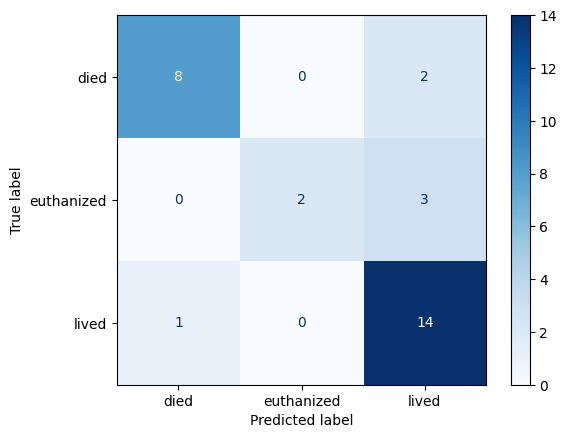

In [49]:
ConfusionMatrixDisplay.from_estimator(best_clf, x_test_transformed, y_test, cmap=plt.cm.Blues)